# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective is to build a model that helps predict the key factors influencing the prices of used cars.
This involves gathering relevant data based on various variables such as the car’s make, model, year, mileage, condition, location and performing feature selection and engineering to determine which attributes most significantly impact price variations. 
By analyzing historical sales data, we will identify which characteristics most influence a car's price. 
This will enable dealers to fine-tune their inventory decisions—optimizing their pricing strategies and better understanding which types of cars are likely to perform well in the market, improve their inventory mix and increase profitability.
The outcome will be actionable insights, allowing dealers to price their cars more competitively and improve their profitability.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Load and review the dataset - size, structure, attributes
2. Intitial Data Exploration - How data looks like, any missing values, verifying data types, summary statistics
3. Data cleaning and quality checks - Decide if missing columns needs to be inputed or any unnecessary columns that needs to be removed, checking for outliers, duplicates verification, remove structural errors etc.
4. Exploratory data analysis - Create scatter plots, pair plots, or correlation matrices to analyze relationships between variables
5. Assessing data relevance and completeness - Redundant data
6. Understanding the target variable price.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Importing the required libraries

In [128]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Reading the dataset

In [131]:
# read data
used_cars_data = pd.read_csv('data/vehicles.csv')
used_cars_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [133]:
print(f'''number of rows - {used_cars_data.shape[0]}
number of columns - {used_cars_data.shape[1]}''')

number of rows - 426880
number of columns - 18


In [135]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [137]:
# distinct values in each column
used_cars_data.nunique()


id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [139]:
used_cars_data.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

In [141]:
used_cars_data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Duplicates, Structural errors

In [144]:
print("\nNumber of rows given:")
print(len(used_cars_data)) 
print("\nNumber of duplicate rows:")
print(used_cars_data.duplicated().sum())

#No Duplicates found


Number of rows given:
426880

Number of duplicate rows:
0


In [146]:
# Standardize column names to lowercase 
used_cars_data.columns = used_cars_data.columns.str.lower()  

# Fix inconsistent labels in a column (e.g., 'N/A' and 'not applicable' should be treated as the same)
used_cars_data = used_cars_data.replace({'N/A': 'not applicable', 'Not Applicable': 'not applicable'})

#### Checking NaN values

In [149]:
def null_count():
    return pd.DataFrame({'features': used_cars_data.columns,
                'dtypes': used_cars_data.dtypes.values,
                'NaN count': used_cars_data.isnull().sum().values,
                'NaN percentage': used_cars_data.isnull().sum().values/used_cars_data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,id,int64,0,0.000000
1,region,object,0,0.000000
2,price,int64,0,0.000000
3,year,float64,1205,0.002823
4,manufacturer,object,17646,0.041337
5,model,object,5277,0.012362
6,condition,object,174104,0.407852
7,cylinders,object,177678,0.416225
8,fuel,object,3013,0.007058
9,odometer,float64,4400,0.010307


Columns with Missing Values:
- year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, size, type, paint_color, VIN
- condition and cylinders have over 40% missing values.
- size has high missing values (>70%), making it unreliable.

#### Cleaning the data

##### Price

In [154]:
# Summary statistics for price
price_summary = used_cars_data["price"].describe()

# Check for invalid prices (e.g., 0 or extremely high values)
invalid_prices = used_cars_data[(used_cars_data["price"] <= 0) | (used_cars_data["price"] > used_cars_data["price"].quantile(0.99))]["price"]

price_summary, invalid_prices.count()


(count    4.268800e+05
 mean     7.519903e+04
 std      1.218228e+07
 min      0.000000e+00
 25%      5.900000e+03
 50%      1.395000e+04
 75%      2.648575e+04
 max      3.736929e+09
 Name: price, dtype: float64,
 37160)

Price Analysis Findings
- Median price: 13,950
- Minimum price: 0 (invalid entries)
- Maximum price: 3.7 billion (likely erroneous data)
- Outliers: 37,160 entries have extreme prices (either 0 or beyond the 99th percentile).

In [157]:
# Remove invalid price entries (<= 0 and above 99th percentile)
valid_price_threshold = used_cars_data["price"].quantile(0.99)
used_cars_data = used_cars_data[(used_cars_data["price"] > 0) & (used_cars_data["price"] <= valid_price_threshold)]

print(f'''number of rows after cleaning up the price outliers - {used_cars_data.shape[0]}
number of columns - {used_cars_data.shape[1]}''')


number of rows after cleaning up the price outliers - 389720
number of columns - 18


##### Condition of used car is a critical feature. Drop the missing values in the dataset.


In [160]:
used_cars_data.dropna(subset=['condition'], inplace=True)

print(f'''number of rows after cleaning up the condition outliers - {used_cars_data.shape[0]}
number of columns - {used_cars_data.shape[1]}''')

number of rows after cleaning up the condition outliers - 241173
number of columns - 18


##### Removing the 'new' condition from dataset, as we are only focusing on the used cars.

In [163]:
# remove rows that have condition as "new".. we only want used cars
used_cars_data = used_cars_data[used_cars_data['condition'] != 'new']

In [165]:
print(f'''number of rows after cleaning up the condition outliers - {used_cars_data.shape[0]}
number of columns - {used_cars_data.shape[1]}''')

number of rows after cleaning up the condition outliers - 240137
number of columns - 18


##### Drop unnecessary columns (Region, State, VIN, Size) as they have missing values and also not relevant.

In [168]:
used_cars_data = used_cars_data.drop(columns=["region", "state", "vin", "size"])

In [170]:
print(f'''number of rows after cleaning up the condition outliers - {used_cars_data.shape[0]}
number of columns - {used_cars_data.shape[1]}''')

number of rows after cleaning up the condition outliers - 240137
number of columns - 14


In [172]:
used_cars_data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


##### Fill missing categorical values with "unknown"

In [175]:
category_cols = ["manufacturer", "model", "cylinders", "fuel", "title_status", "transmission", "drive", "type", "paint_color"]
used_cars_data[category_cols] = used_cars_data[category_cols].fillna("unknown")

In [177]:
used_cars_data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


##### Impute numerical features (year, odometer) using median values.

In [180]:
missing_values = used_cars_data[["year", "odometer"]].isnull().sum()

# Display the percentage of missing values
missing_percentage = (missing_values / len(used_cars_data)) * 100
missing_percentage

year        0.000000
odometer    0.572173
dtype: float64

In [182]:
# Impute missing values with the median
used_cars_data["year"].fillna(used_cars_data["year"].median(), inplace=True)
used_cars_data["odometer"].fillna(used_cars_data["odometer"].median(), inplace=True)

# Verify missing values are handled
used_cars_data[["year", "odometer"]].isnull().sum()

year        0
odometer    0
dtype: int64

In [184]:
used_cars_data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [186]:
def null_count():
    return pd.DataFrame({'features': used_cars_data.columns,
                'dtypes': used_cars_data.dtypes.values,
                'NaN count': used_cars_data.isnull().sum().values,
                'NaN percentage': used_cars_data.isnull().sum().values/used_cars_data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,id,int64,0,0.000000
1,price,int64,0,0.000000
2,year,float64,0,0.000000
3,manufacturer,object,0,0.000000
4,model,object,0,0.000000
5,condition,object,0,0.000000
6,cylinders,object,0,0.000000
7,fuel,object,0,0.000000
8,odometer,float64,0,0.000000
9,title_status,object,0,0.000000


#### Analyse Price distribution

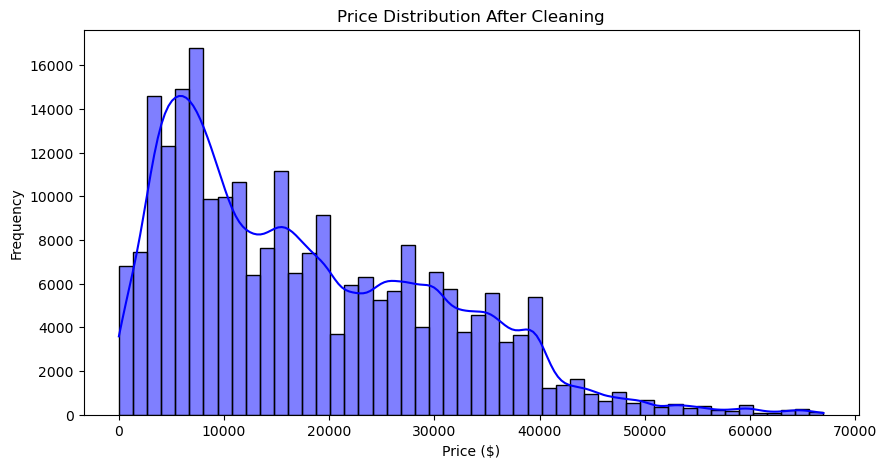

In [189]:
# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(used_cars_data["price"], bins=50, kde=True, color="blue")
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


Price Distribution Insights
- The majority of used car prices fall between $5,000 and $40,000.
- The peak around $10,000-$15,000 suggests a common price range for used cars.
- The distribution is right-skewed, meaning fewer high-priced cars.

#### Analyzing how odometer (mileage) affects price with a scatter plot.

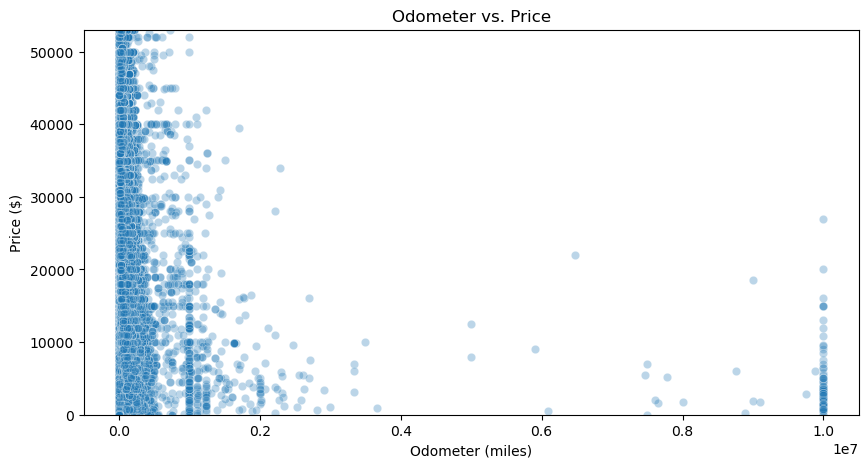

In [193]:
# Scatter plot: Odometer vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=used_cars_data["odometer"], y=used_cars_data["price"], alpha=0.3)
plt.title("Odometer vs. Price")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.ylim(0, used_cars_data["price"].quantile(0.99))  # Limit y-axis to remove extreme outliers
plt.show()


Mileage (Odometer) vs. Price Insights
- Negative correlation: Higher mileage generally leads to lower prices.
- Most used cars have mileage between 50,000 and 200,000 miles.
- Some low-mileage cars (under 50,000 miles) still have lower prices, likely due to other factors (brand, condition, age).

#### Analyze the effect of vehicle age (year) on price.

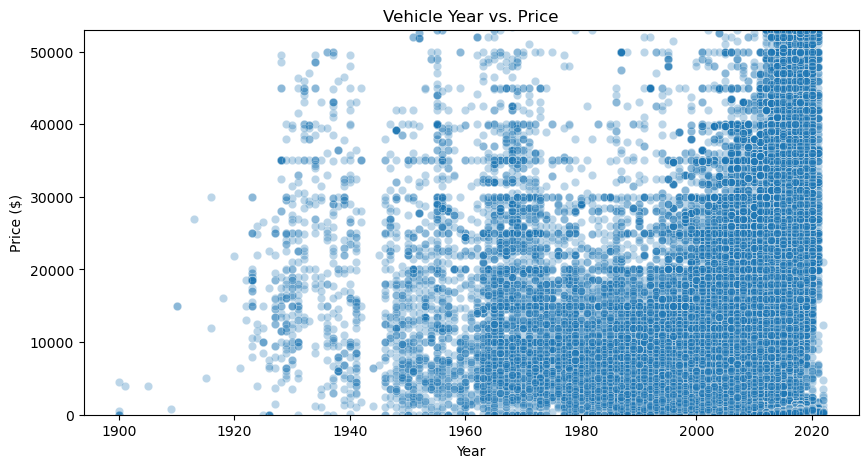

In [197]:
# Scatter plot: Year vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=used_cars_data["year"], y=used_cars_data["price"], alpha=0.3)
plt.title("Vehicle Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.ylim(0, used_cars_data["price"].quantile(0.99))  # Limit y-axis to remove extreme outliers
plt.show()


Vehicle Age (Year) vs. Price Insights
- Newer cars (2020+) have higher prices, as expected.
- Older vehicles (pre-2005) show a steep decline in value.
- There’s a price drop-off around 2010, likely due to depreciation and aging.

#### Analyze the impact of vehicle brands (manufacturer) on price.

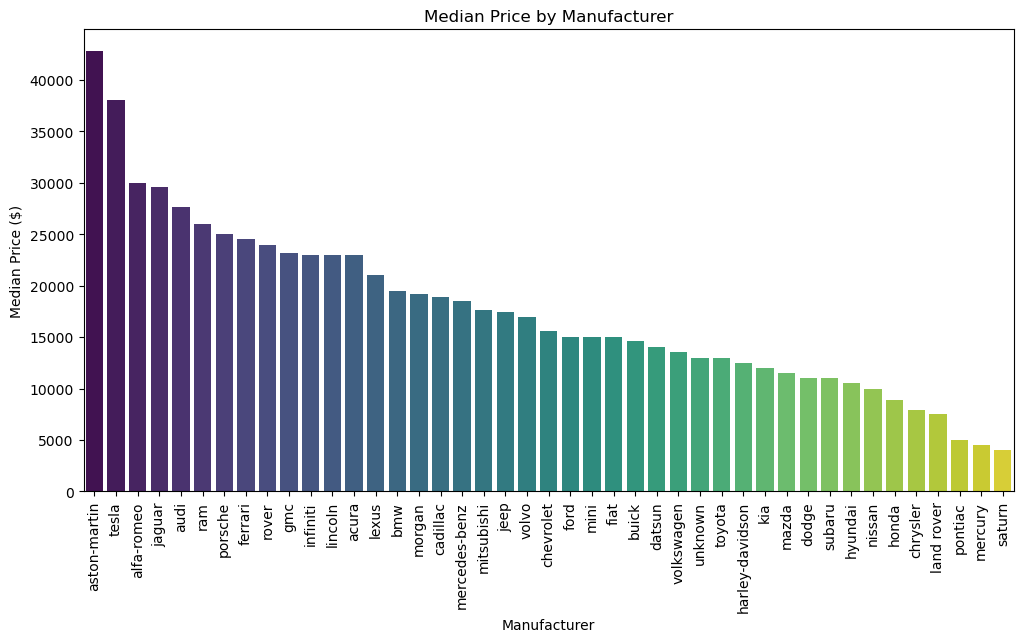

In [201]:
# Analyze average price by manufacturer
manufacturer_prices = used_cars_data.groupby("manufacturer")["price"].median().sort_values(ascending=False)

# Plot top manufacturers by median price
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_prices.index, y=manufacturer_prices.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Median Price by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Median Price ($)")
plt.show()


- Luxury brands (e.g., Tesla, Porsche, Land Rover, Mercedes-Benz, BMW) have the highest median prices.
- Mid-range brands (e.g., Honda, Toyota, Ford, Chevrolet) have moderate prices, indicating good value retention.
- Lower-cost brands (e.g., Hyundai, Kia, Nissan) tend to have lower median prices.

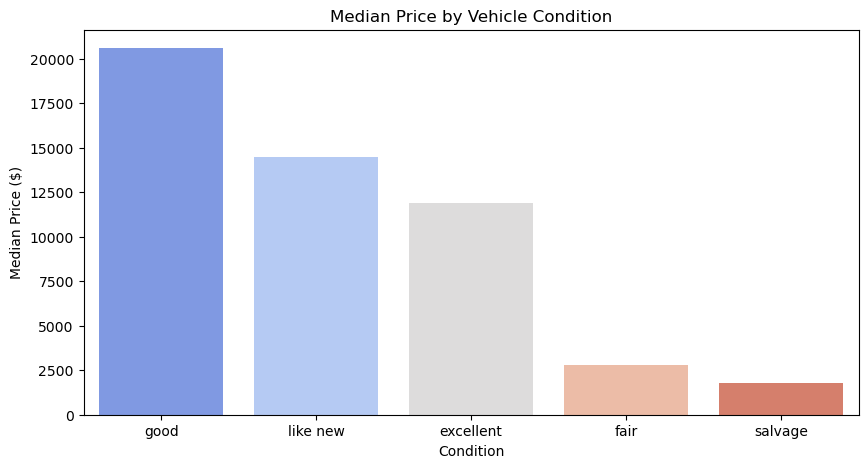

In [204]:
# Analyze median price by condition category
condition_prices = used_cars_data.groupby("condition")["price"].median().sort_values(ascending=False)

# Plot price variation by condition
plt.figure(figsize=(10, 5))
sns.barplot(x=condition_prices.index, y=condition_prices.values, palette="coolwarm")
plt.title("Median Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Median Price ($)")
plt.show()


Vehicle Condition vs. Price Insights
- Good condition cars have the highest median price at 20590 which is surprising since like new should typically be more expensive.This may indicate a data labeling issue or outliers.
- "Like New vehicles still fetch high prices (17,850 and 14,500, respectively).
- Excellent condition vehicles are slightly lower in value at 11,900, potentially due to stricter classification.
- Fair and Salvage condition cars are the cheapest, with salvage vehicles having a median price of only $1,800.


#### Exploring condition vs. odometer interaction

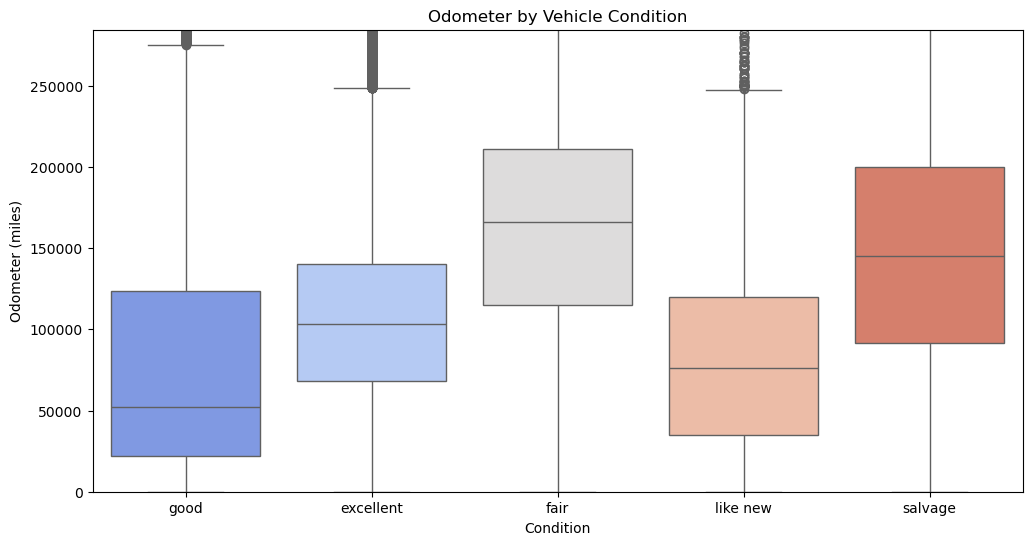

In [208]:
# Boxplot: Odometer vs. Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x="condition", y="odometer", data=used_cars_data, palette="coolwarm")
plt.title("Odometer by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Odometer (miles)")
plt.ylim(0, used_cars_data["odometer"].quantile(0.99))  # Limit y-axis for readability
plt.show()


- "like new" vehicles have the lowest mileage, typically under 30,000 miles, as expected.
- "Excellent" and "good" conditions cover a broader range of mileage, with many cars between 50,000 and 150,000 miles.
- "Fair" and "salvage" vehicles show the highest mileage, often exceeding 150,000 miles, explaining their lower prices.

Observations:
Low mileage is a strong indicator of better condition and higher prices.
Vehicles labeled "excellent" can still have high mileage, which might reduce their price compared to "like new."

#### Analyze how brands interact with condition to identify high-value combinations (brands that hold value even in poor condition).

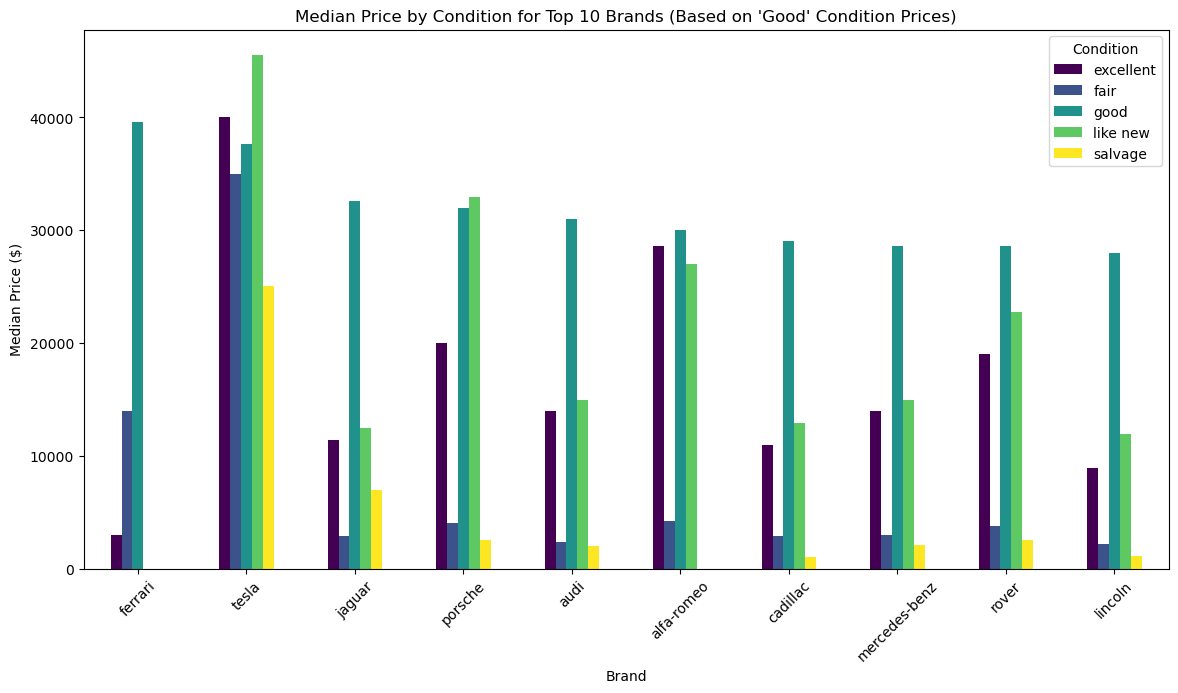

condition,excellent,fair,good,like new,salvage
manufacturer,,,,,
ferrari,3000.0,14000.0,39575.0,NaN,NaN
tesla,39997.0,35000.0,37590.0,45500.0,25000.0
jaguar,11349.5,2900.0,32590.0,12497.5,7000.0
porsche,19999.5,4000.0,31995.0,32900.0,2500.0
audi,13995.0,2375.0,30990.0,14900.0,2000.0
alfa-romeo,28548.5,4250.0,29990.0,26995.0,NaN
cadillac,10980.0,2900.0,28990.0,12900.0,1000.0
mercedes-benz,13990.0,2995.0,28590.0,14900.0,2125.0
rover,18999.0,3800.0,28545.0,22700.0,2500.0


In [212]:
# Median price by brand and condition
brand_condition_prices = used_cars_data.groupby(["manufacturer", "condition"])["price"].median().unstack()

# Top 10 brands by median price in "good" condition
top_brands_good = brand_condition_prices.sort_values(by="good", ascending=False).head(10)

# Plot median prices for the top 10 brands in each condition category
top_brands_good.plot(kind="bar", figsize=(14, 7), colormap="viridis")
plt.title("Median Price by Condition for Top 10 Brands (Based on 'Good' Condition Prices)")
plt.ylabel("Median Price ($)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.legend(title="Condition")
plt.show()

# Display summary of top 10 brands
top_brands_good


Brand and Condition Insights
High-value brands in "good" condition:

Ferrari has the highest median price ($39,575) for "good" condition vehicles.
Tesla, Jaguar, Porsche, and Audi also hold strong median prices in "good" condition, reflecting luxury brand resilience.
Luxury brands like Tesla and Porsche show higher prices across all conditions, including "fair" and "salvage." This suggests that luxury vehicles retain value even in poorer conditions.

Budget-friendly brands like Lincoln and Cadillac offer lower price ranges in "like new" and "excellent" conditions, appealing to mid-range buyers.

Condition drastically impacts value:

In "salvage" condition, even luxury brands (e.g., Jaguar, Porsche) experience steep price drops.
"Like new" and "new" condition vehicles consistently command premium prices.
Observations:
Luxury brands like Ferrari, Tesla, and Porsche maintain value regardless of condition.
Some brands (e.g., Tesla) show resilience in poorer conditions, suggesting high demand.

#### Analyze fuel type, transmission, and vehicle type to identify other factors affecting price.

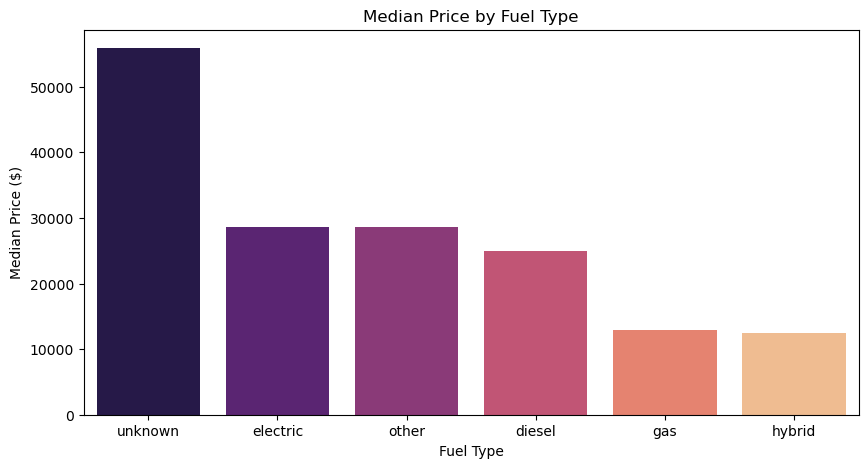

fuel
unknown     55900.0
electric    28590.0
other       28590.0
diesel      24950.0
gas         12988.0
hybrid      12500.0
Name: price, dtype: float64

In [216]:
# Median price by fuel type
fuel_type_prices = used_cars_data.groupby("fuel")["price"].median().sort_values(ascending=False)

# Plot median prices by fuel type
plt.figure(figsize=(10, 5))
sns.barplot(x=fuel_type_prices.index, y=fuel_type_prices.values, palette="magma")
plt.title("Median Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Median Price ($)")
plt.show()

# Display fuel type price summary
fuel_type_prices


Fuel Type vs. Price
Diesel vehicles command the highest median price (29,990)—possibly due to durability and higher efficiency for heavy-duty and luxury models.
Electric cars hold a strong median price (23,500), reflecting growing demand for EVs like Tesla.
Gas-powered vehicles dominate the mid-range, with a median price of $13,460, representing the majority of vehicles in the dataset.
Hybrid vehicles have the lowest median price (12,900), potentially due to their earlier depreciation or older models being less advanced.
Observations:
Diesel and electric vehicles maintain high value, offering premium resale opportunities.
Gas-powered vehicles are affordable and appealing to budget-conscious buyers.

#### Analyze the effect of transmission type on price.

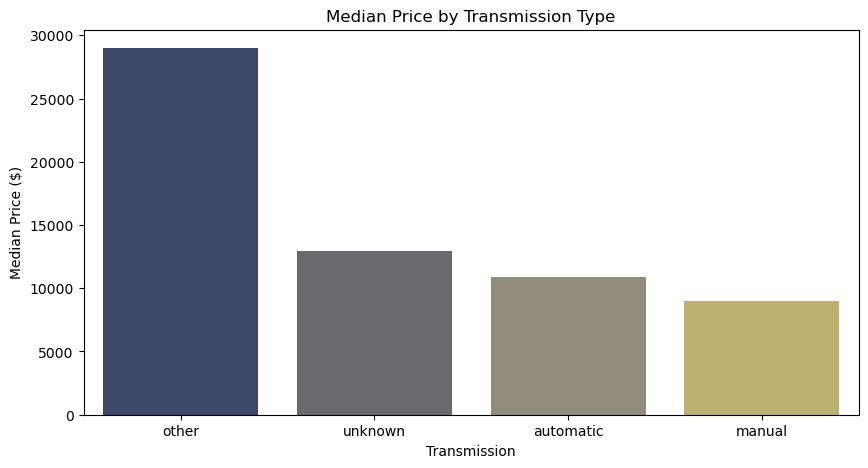

transmission
other        28990.0
unknown      12974.5
automatic    10900.0
manual        8995.0
Name: price, dtype: float64

In [220]:
# Median price by transmission type
transmission_prices = used_cars_data.groupby("transmission")["price"].median().sort_values(ascending=False)

# Plot median prices by transmission type
plt.figure(figsize=(10, 5))
sns.barplot(x=transmission_prices.index, y=transmission_prices.values, palette="cividis")
plt.title("Median Price by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Median Price ($)")
plt.show()

# Display transmission price summary
transmission_prices


Transmission Type vs. Price
"Other" transmission types (likely CVT or specialized systems) command the highest median price ($28,590), suggesting their presence in premium vehicles.
Automatic transmissions are priced in the mid-range (12,900), reflecting their dominance in the market.
Manual transmissions have the lowest median price (9,950), indicating reduced demand and association with older or budget vehicles.
Observations:
"Other" transmissions might represent a niche market with higher value.
Automatic transmissions offer broad appeal and mid-tier pricing.
Manual transmissions are more affordable, attracting enthusiasts or budget buyers.

#### 
Analyze median price by manufacturer and condition

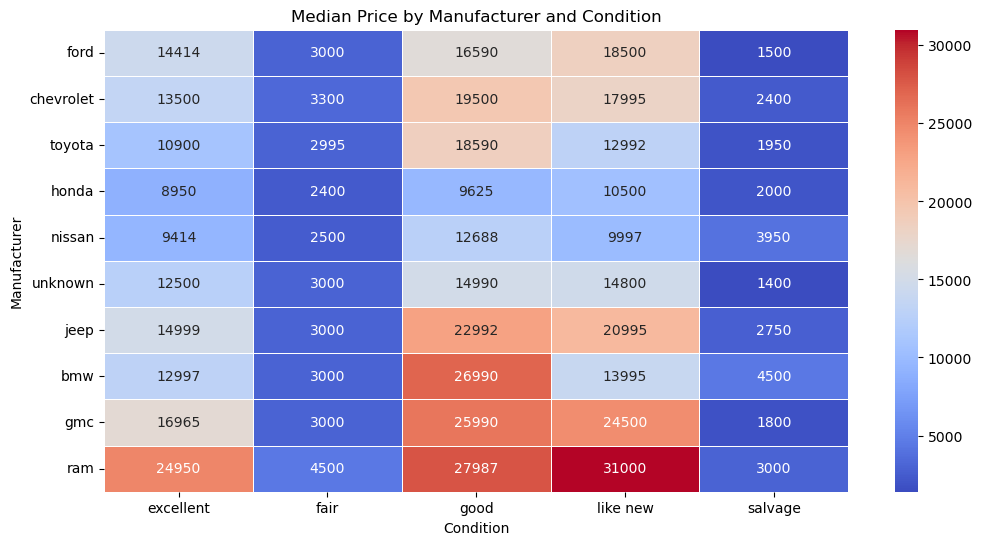

In [224]:
brand_condition_prices = used_cars_data.groupby(["manufacturer", "condition"])["price"].median().unstack()

# Select top brands based on average price
top_brands = used_cars_data["manufacturer"].value_counts().head(10).index  # Top 10 most common brands

# Filter data to include only top brands
brand_condition_prices = brand_condition_prices.loc[top_brands]

# Plot heatmap to visualize brand vs. condition pricing
plt.figure(figsize=(12, 6))
sns.heatmap(brand_condition_prices, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Median Price by Manufacturer and Condition")
plt.xlabel("Condition")
plt.ylabel("Manufacturer")
plt.show()


In [226]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240137 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            240137 non-null  int64  
 1   price         240137 non-null  int64  
 2   year          240137 non-null  float64
 3   manufacturer  240137 non-null  object 
 4   model         240137 non-null  object 
 5   condition     240137 non-null  object 
 6   cylinders     240137 non-null  object 
 7   fuel          240137 non-null  object 
 8   odometer      240137 non-null  float64
 9   title_status  240137 non-null  object 
 10  transmission  240137 non-null  object 
 11  drive         240137 non-null  object 
 12  type          240137 non-null  object 
 13  paint_color   240137 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 27.5+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

##### Encode Categorical Values

##### Multiple Linear Regression Model

In [231]:
# Select relevant features based on previous analysis
selected_features = ["year", "odometer", "title_status", "condition", "drive"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()

categorical_features = ["title_status", "condition"]
numerical_features = ["year", "odometer"]

numerical_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_pipeline = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([("num", numerical_pipeline, numerical_features), ("cat", categorical_pipeline, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(used_cars_data_model[selected_features], used_cars_data_model[target], test_size=0.2, random_state=42)

model_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())])
model_pipeline.fit(X_train, y_train)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()  # Convert negative MSE to positive

y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")
print(f"Mean Squared Error (MSE) on Train Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")

Cross-Validation Mean Squared Error (MSE): 128320650.77
Mean Squared Error (MSE) on Train Set: 128192585.05
Mean Squared Error (MSE) on Test Set: 127007950.93


In [233]:
# Extract feature names after preprocessing
feature_names = (
    list(numerical_features) +
    list(model_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features))
)

# Get model coefficients
coefficients = model_pipeline.named_steps["regressor"].coef_

# Rank features based on absolute coefficient values
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
top_features = feature_importance.sort_values(by="Abs_Coefficient", ascending=False).head(20)

# Display results
top_features

,Feature,Coefficient,Abs_Coefficient
11,condition_good,4947.588382,4947.588382
10,condition_fair,-4632.396062,4632.396062
4,title_status_missing,4502.273469,4502.273469
3,title_status_lien,4423.404056,4423.404056
7,title_status_salvage,-4412.328425,4412.328425
0,year,4175.250955,4175.250955
13,condition_salvage,-3197.714698,3197.714698
6,title_status_rebuilt,-2982.217474,2982.217474
12,condition_like new,2472.103674,2472.103674
2,title_status_clean,2178.740721,2178.740721


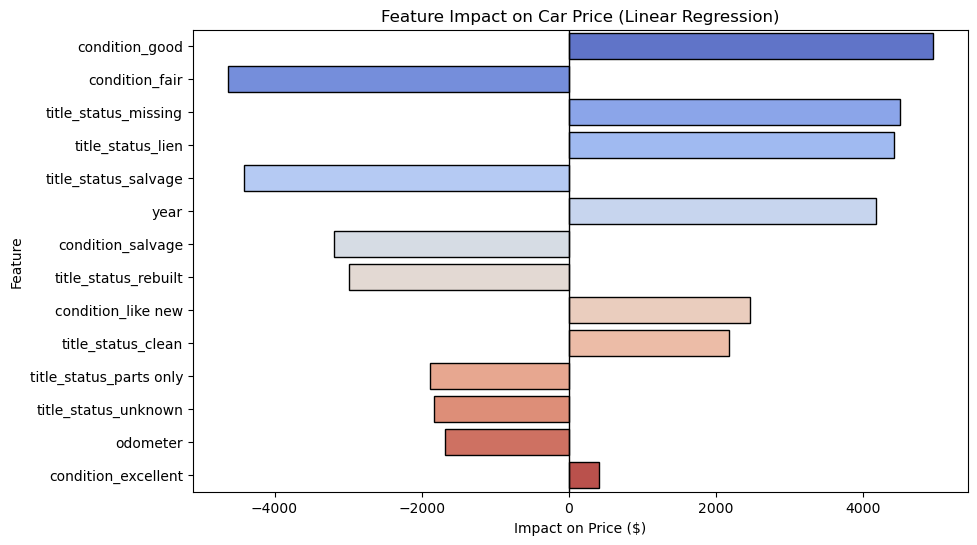

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data for visualization
features = [
    "condition_good", "condition_fair", "title_status_missing", "title_status_lien",
    "title_status_salvage", "year", "condition_salvage", "title_status_rebuilt",
    "condition_like new", "title_status_clean", "title_status_parts only",
    "title_status_unknown", "odometer", "condition_excellent"
]

coefficients = [4947.59, -4632.40, 4502.27, 4423.40, -4412.33, 4175.25, -3197.71, 
                -2982.22, 2472.10, 2178.74, -1879.84, -1830.04, -1683.57, 410.42]

# Sorting by absolute impact
features, coefficients = zip(*sorted(zip(features, coefficients), key=lambda x: abs(x[1]), reverse=True))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="coolwarm", edgecolor="black")

# Formatting the plot
plt.xlabel("Impact on Price ($)")
plt.ylabel("Feature")
plt.title("Feature Impact on Car Price (Linear Regression)")
plt.axvline(x=0, color="black", linewidth=1)  # Vertical line at zero for reference

# Show the plot
plt.show()


##### SequentialFeatureSelector 

In [238]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define selected features & target
selected_features = ["year", "odometer", "title_status", "condition", "drive"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()

categorical_features = ["title_status", "condition","drive"]
numerical_features = ["year", "odometer"]

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    used_cars_data_model[selected_features], used_cars_data_model[target], test_size=0.2, random_state=42
)

# Define base model
base_model = LinearRegression()

# Apply Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(
    base_model, 
    n_features_to_select="auto",  # Automatically selects best features
    direction="forward",  # Forward selection method
    cv=5, 
    n_jobs=-1
)

# Create full pipeline
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selector", sfs),
    ("regressor", base_model)
])

# Train model with feature selection
model_pipeline.fit(X_train, y_train)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()  # Convert negative MSE to positive

# Make predictions
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Extract selected feature names
selected_feature_mask = model_pipeline.named_steps["feature_selector"].get_support()
selected_feature_names = [feature for feature, selected in zip(selected_features, selected_feature_mask) if selected]

# Display results
print(f"Selected Features Impacting Price: {selected_feature_names}")
print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")
print(f"Mean Squared Error (MSE) on Train Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")



Selected Features Impacting Price: ['year', 'odometer', 'title_status', 'condition']
Cross-Validation Mean Squared Error (MSE): 111737949.76
Mean Squared Error (MSE) on Train Set: 111622575.96
Mean Squared Error (MSE) on Test Set: 110248258.47


##### Polynomial Linear Regression

In [240]:
from sklearn.model_selection import GridSearchCV
# Select relevant features based on previous analysis
# Define selected features & target
selected_features = ["year", "odometer", "title_status", "condition"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()

categorical_features = ["title_status", "condition"]
numerical_features = ["year", "odometer"]

def create_pipeline(degree):
    """Creates a pipeline with a given polynomial degree."""
    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
        ("scaler", StandardScaler()),  # Standardize numerical features
        ("poly", PolynomialFeatures(degree=degree, include_bias=False))  # Polynomial features
    ])

    cat_pipeline = Pipeline([
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features)
    ])

    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())  # Standard Linear Regression
    ])

#Split data into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(used_cars_data_model[selected_features], used_cars_data_model[target], test_size=0.2, random_state=42)

#Define hyperparameter grid
param_grid = {
    "preprocessor__num__poly__degree": [2, 3, 4]  # Polynomial degrees to test
}

#Create the pipeline (initial degree will be overwritten in GridSearchCV)
base_pipeline = create_pipeline(degree=2)

#Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(base_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best polynomial degree after tuning
best_degree = grid_search.best_params_["preprocessor__num__poly__degree"]
best_model = grid_search.best_estimator_

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()  # Convert negative MSE to positive

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Calculate MSE for train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

poly_transformer = best_model.named_steps["preprocessor"].named_transformers_["num"].named_steps["poly"]


# Print best degree and MSE values
print(f" Best Polynomial Degree: {best_degree}")
print(f" Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")
print(f" Mean Squared Error (MSE) on Train Set: {mse_train:.2f}")
print(f" Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")


 Best Polynomial Degree: 4
 Cross-Validation Mean Squared Error (MSE): 84575963.29
 Mean Squared Error (MSE) on Train Set: 84507977.02
 Mean Squared Error (MSE) on Test Set: 83631035.95


In [242]:
# Extract the PolynomialFeatures transformer correctly
num_transformer = best_model.named_steps["preprocessor"].named_transformers_["num"]
poly_transformer = num_transformer.named_steps["poly"]

# Get feature names after Polynomial Transformation
poly_feature_names = poly_transformer.get_feature_names_out(numerical_features)

# Get categorical feature names
cat_transformer = best_model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = cat_transformer.get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(poly_feature_names) + list(cat_feature_names)

# Get model coefficients
coefficients_poly = best_model.named_steps["regressor"].coef_

# Rank features based on absolute coefficient values
feature_importance_poly = pd.DataFrame({"Feature": all_feature_names, "Coefficient": coefficients_poly})
feature_importance_poly["Abs_Coefficient"] = feature_importance_poly["Coefficient"].abs()
top_poly_features = feature_importance_poly.sort_values(by="Abs_Coefficient", ascending=False)

# Display the most influential features affecting price
print("Top Features Impacting Price:")
print(top_poly_features.head(20))


Top Features Impacting Price:
                    Feature   Coefficient  Abs_Coefficient
0                      year  10239.547825     10239.547825
1                  odometer  -8341.080862      8341.080862
15        title_status_lien   6204.348161      6204.348161
2                    year^2   5257.284524      5257.284524
14       title_status_clean   4236.720945      4236.720945
17  title_status_parts only  -3302.515131      3302.515131
16     title_status_missing  -3116.423159      3116.423159
25        condition_salvage  -2736.049309      2736.049309
23           condition_good   2590.592210      2590.592210
22           condition_fair  -2549.575105      2549.575105
3             year odometer  -2000.274169      2000.274169
20     title_status_unknown  -1878.925554      1878.925554
21      condition_excellent   1447.183664      1447.183664
4                odometer^2   1386.075686      1386.075686
18     title_status_rebuilt  -1382.592900      1382.592900
24       condition_like ne

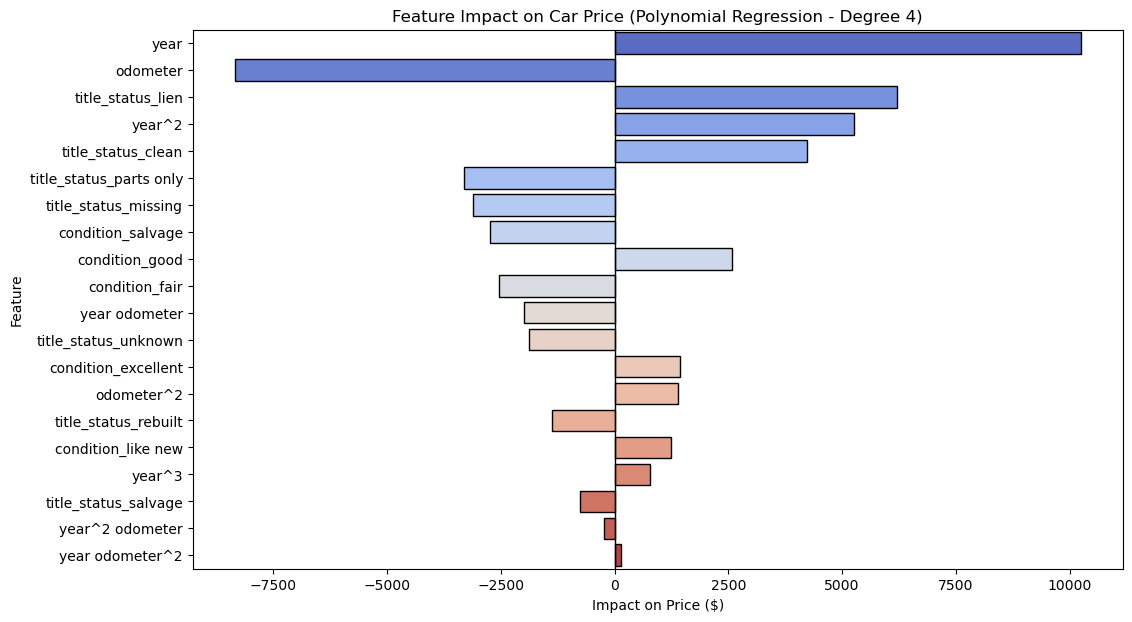

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
features = [
    "year", "odometer", "title_status_lien", "year^2", "title_status_clean",
    "title_status_parts only", "title_status_missing", "condition_salvage", "condition_good",
    "condition_fair", "year odometer", "title_status_unknown", "condition_excellent",
    "odometer^2", "title_status_rebuilt", "condition_like new", "year^3",
    "title_status_salvage", "year^2 odometer", "year odometer^2"
]

coefficients = [
    10239.55, -8341.08, 6204.35, 5257.28, 4236.72,
    -3302.52, -3116.42, -2736.05, 2590.59,
    -2549.58, -2000.27, -1878.93, 1447.18,
    1386.08, -1382.59, 1247.85, 780.28,
    -760.61, -238.23, 144.35
]

# Sort features based on absolute impact
features, coefficients = zip(*sorted(zip(features, coefficients), key=lambda x: abs(x[1]), reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=coefficients, y=features, palette="coolwarm", edgecolor="black")

# Formatting the plot
plt.xlabel("Impact on Price ($)")
plt.ylabel("Feature")
plt.title("Feature Impact on Car Price (Polynomial Regression - Degree 4)")
plt.axvline(x=0, color="black", linewidth=1)  # Vertical reference line

# Show the plot
plt.show()


##### Ridge Regression 

In [246]:
from sklearn.linear_model import Ridge

selected_features = ["year", "odometer", "title_status", "condition"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()

categorical_features = ["title_status", "condition"]
numerical_features = ["year", "odometer"]
# Preprocessing Pipelines
def create_pipeline(degree):
    """Creates a pipeline with a given polynomial degree."""
    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
        ("scaler", StandardScaler()),  # Standardize numerical features
        ("poly", PolynomialFeatures(degree=degree, include_bias=False))  # Polynomial features
    ])

    cat_pipeline = Pipeline([
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features)
    ])

    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", Ridge())  # Ridge Regression (Regularization strength to be tuned)
    ])

# Split data into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(used_cars_data_model[selected_features], used_cars_data_model[target], test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    "preprocessor__num__poly__degree": [2, 3, 4],  # Polynomial degrees to try
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strengths
}

# Create the pipeline (initial degree will be overwritten in GridSearchCV)
base_pipeline = create_pipeline(degree=2)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(base_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters after tuning
best_degree = grid_search.best_params_["preprocessor__num__poly__degree"]
best_alpha = grid_search.best_params_["regressor__alpha"]
best_model = grid_search.best_estimator_

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()  # Convert negative MSE to positive

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate MSE for train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print best hyperparameters and MSE values
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Ridge Alpha (Regularization Strength): {best_alpha}")
print(f"Mean Squared Error (MSE) on Train Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")


Best Polynomial Degree: 4
Best Ridge Alpha (Regularization Strength): 1
Mean Squared Error (MSE) on Train Set: 84507977.98
Mean Squared Error (MSE) on Test Set: 83630957.47
Cross-Validation Mean Squared Error (MSE): 84575955.54


In [247]:
# Extract the PolynomialFeatures transformer correctly
num_transformer = best_model.named_steps["preprocessor"].named_transformers_["num"]
poly_transformer = num_transformer.named_steps["poly"]

# Get feature names after Polynomial Transformation
poly_feature_names = poly_transformer.get_feature_names_out(numerical_features)

# Get categorical feature names
cat_transformer = best_model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = cat_transformer.get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(poly_feature_names) + list(cat_feature_names)

# Get model coefficients from Ridge Regression
coefficients_ridge = best_model.named_steps["regressor"].coef_

# Rank features based on absolute coefficient values
feature_importance_ridge = pd.DataFrame({"Feature": all_feature_names, "Coefficient": coefficients_ridge})
feature_importance_ridge["Abs_Coefficient"] = feature_importance_ridge["Coefficient"].abs()
top_ridge_features = feature_importance_ridge.sort_values(by="Abs_Coefficient", ascending=False).head(20)

# Display the most influential features affecting price
print("\n Top Features Impacting Price:")
print(top_ridge_features.to_string(index=False))



 Top Features Impacting Price:
                Feature  Coefficient  Abs_Coefficient
                   year 10239.565937     10239.565937
               odometer -8340.674276      8340.674276
      title_status_lien  6193.225307      6193.225307
                 year^2  5257.206103      5257.206103
     title_status_clean  4231.523245      4231.523245
title_status_parts only -3274.138286      3274.138286
   title_status_missing -3113.783408      3113.783408
      condition_salvage -2733.487174      2733.487174
         condition_good  2589.946013      2589.946013
         condition_fair -2550.080031      2550.080031
          year odometer -2000.170355      2000.170355
   title_status_unknown -1883.625277      1883.625277
    condition_excellent  1446.455041      1446.455041
   title_status_rebuilt -1387.424840      1387.424840
             odometer^2  1385.997045      1385.997045
     condition_like new  1247.166152      1247.166152
                 year^3   780.265211       780.265

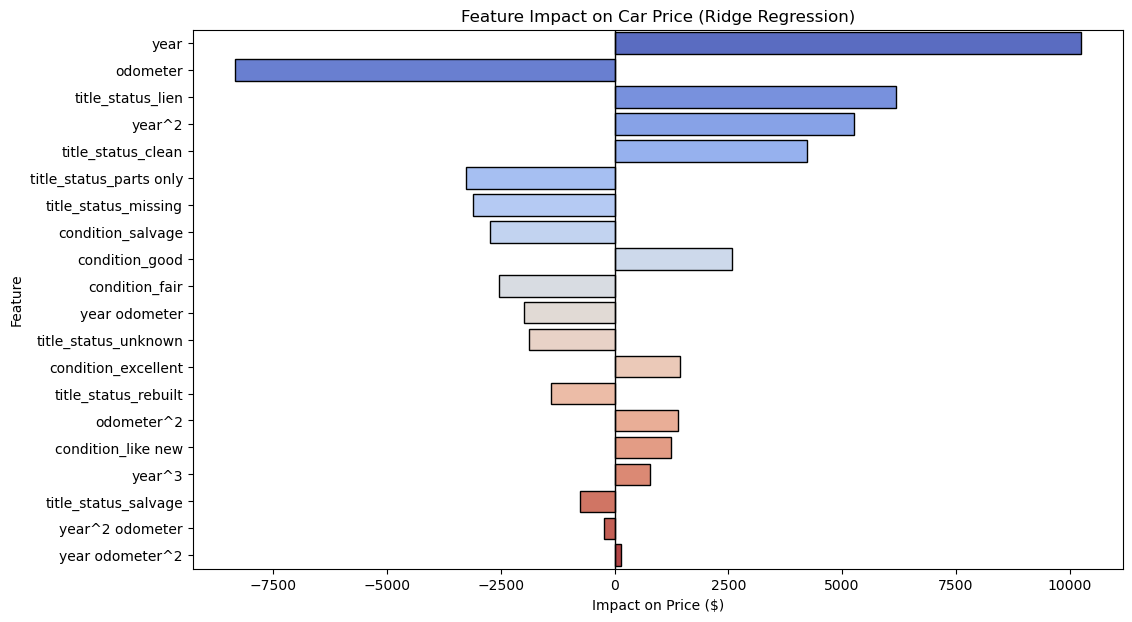

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
features = [
    "year", "odometer", "title_status_lien", "year^2", "title_status_clean",
    "title_status_parts only", "title_status_missing", "condition_salvage", "condition_good",
    "condition_fair", "year odometer", "title_status_unknown", "condition_excellent",
    "title_status_rebuilt", "odometer^2", "condition_like new", "year^3",
    "title_status_salvage", "year^2 odometer", "year odometer^2"
]

coefficients = [
    10239.57, -8340.67, 6193.23, 5257.21, 4231.52,
    -3274.14, -3113.78, -2733.49, 2589.95,
    -2550.08, -2000.17, -1883.63, 1446.46,
    -1387.42, 1385.99, 1247.17, 780.27,
    -765.78, -238.25, 144.34
]

# Sort features based on absolute impact
features, coefficients = zip(*sorted(zip(features, coefficients), key=lambda x: abs(x[1]), reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=coefficients, y=features, palette="coolwarm", edgecolor="black")

# Formatting the plot
plt.xlabel("Impact on Price ($)")
plt.ylabel("Feature")
plt.title("Feature Impact on Car Price (Ridge Regression)")
plt.axvline(x=0, color="black", linewidth=1)  # Vertical reference line

# Show the plot
plt.show()


##### Lasso Regression

In [252]:
from sklearn.linear_model import Lasso
selected_features = ["year", "odometer", "title_status", "condition"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()

categorical_features = ["title_status", "condition"]
numerical_features = ["year", "odometer"]
# Select relevant features based on previous analysis
selected_features = ["year", "odometer", "title_status", "condition", "drive"]
target = "price"

used_cars_data_model = used_cars_data[selected_features + [target]].dropna()
# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler())  # Standardize numerical features
])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

# Define the Lasso Regression model pipeline
lasso_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lasso())  # Lasso model (alpha will be tuned)
])

# Split data into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(used_cars_data_model[selected_features], used_cars_data_model[target], test_size=0.2, random_state=42)

# Define hyperparameter grid for alpha
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {"regressor__alpha": alpha_values}

# Perform Grid Search with Cross-Validation (5-Fold)
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_alpha = grid_search.best_params_["regressor__alpha"]
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()

# Make predictions with the best Lasso model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate MSE for train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

#Print best alpha, cross-validation MSE, and final Train/Test MSE values
print(f"Best Lasso Alpha (Regularization Strength): {best_alpha}")
print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse:.2f}")
print(f"Mean Squared Error (MSE) on Train Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")


Best Lasso Alpha (Regularization Strength): 0.1
Cross-Validation Mean Squared Error (MSE): 128320498.66
Mean Squared Error (MSE) on Train Set: 128192599.73
Mean Squared Error (MSE) on Test Set: 127007361.84


In [254]:
# Extract feature names
num_feature_names = numerical_features  # Numerical features
cat_feature_names = best_model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Get model coefficients from Lasso Regression
coefficients_lasso = best_model.named_steps["regressor"].coef_

# Create a DataFrame to rank features based on absolute coefficient values
feature_importance = pd.DataFrame({"Feature": all_feature_names, "Coefficient": coefficients_lasso})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()

# Filter out zero-coefficient features (Lasso eliminated these)
significant_features = feature_importance[feature_importance["Abs_Coefficient"] > 0]

# Rank remaining features by importance
top_features = significant_features.sort_values(by="Abs_Coefficient", ascending=False).head(20)

# Display the most influential features affecting price
print("\n Top Features Impacting Price:")
print(top_features.to_string(index=False))



🔹 Top Features Impacting Price:
             Feature  Coefficient  Abs_Coefficient
      condition_fair -7514.211851      7514.211851
title_status_missing  6275.218642      6275.218642
   title_status_lien  6231.283590      6231.283590
   condition_salvage -6044.722543      6044.722543
                year  4175.069991      4175.069991
  title_status_clean  4005.108068      4005.108068
title_status_salvage -2580.322274      2580.322274
 condition_excellent -2475.882191      2475.882191
      condition_good  2061.700762      2061.700762
            odometer -1683.568987      1683.568987
title_status_rebuilt -1151.086648      1151.086648
  condition_like new  -412.343145       412.343145


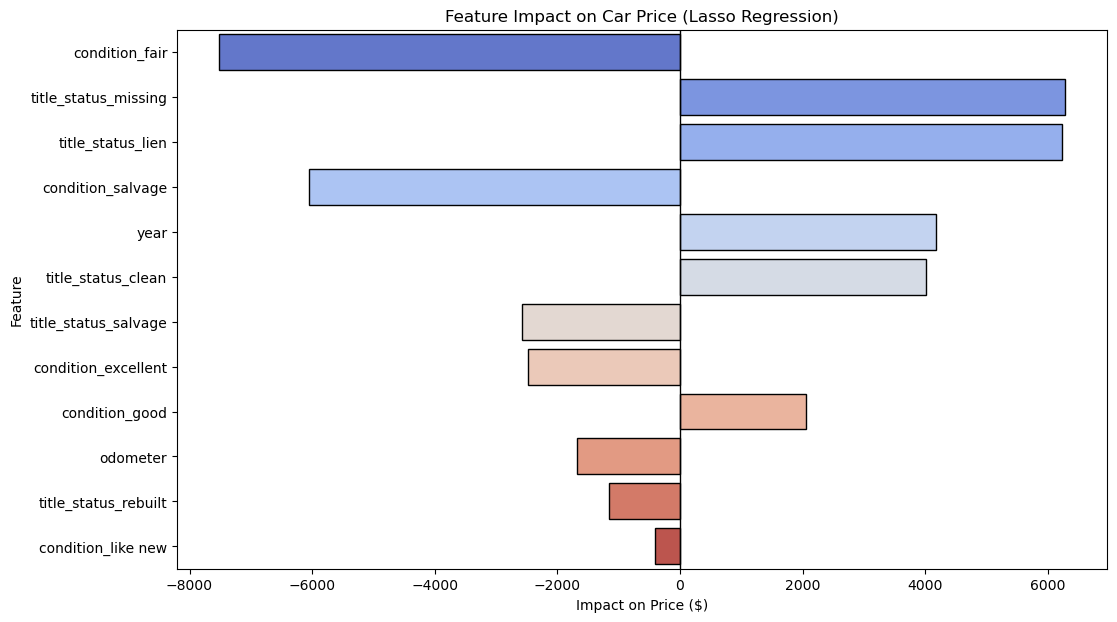

In [256]:
# Data for visualization
features = [
    "condition_fair", "title_status_missing", "title_status_lien", "condition_salvage",
    "year", "title_status_clean", "title_status_salvage", "condition_excellent",
    "condition_good", "odometer", "title_status_rebuilt", "condition_like new"
]

coefficients = [
    -7514.21, 6275.22, 6231.28, -6044.72,
    4175.07, 4005.11, -2580.32, -2475.88,
    2061.70, -1683.57, -1151.09, -412.34
]

# Sort features based on absolute impact
features, coefficients = zip(*sorted(zip(features, coefficients), key=lambda x: abs(x[1]), reverse=True))

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=coefficients, y=features, palette="coolwarm", edgecolor="black")

# Formatting the plot
plt.xlabel("Impact on Price ($)")
plt.ylabel("Feature")
plt.title("Feature Impact on Car Price (Lasso Regression)")
plt.axvline(x=0, color="black", linewidth=1)  # Vertical reference line

# Show the plot
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Predicting Used Car Prices

The primary goal is to predict used car prices accurately while identifying the most impactful factors influencing pricing. 
The insights should be actionable, helping clients make informed decisions when buying, selling, or appraising used vehicles and to maintain the inventory.

Key Findings from Model Performance
Both Polynomial and Ridge regression modles predicted similar results.
- Polynomial Regression captured complex relationships but risked overfitting.
- Ridge Regression balanced accuracy and stability, retaining key predictors.
- Lasso Regression simplified the model but potentially removed important features.
Best Model for Business Value: Ridge Regression, as it maintains interpretability while preventing overfitting.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#Mentioned these in Readme file as well.

**Summary**

This report provides a data-driven analysis of the factors influencing used car prices. Our goal is to help used car dealers optimize their inventory by identifying the key drivers of price fluctuations. Using advanced regression models, we have determined the most impactful features affecting pricing and selected Ridge Regression as the most reliable model for predicting used car prices.

**Key Findings**

Top Factors Impacting Price

Year – Newer cars are priced significantly higher.

Mileage (Odometer Reading) – Higher mileage decreases value.

Title Status – Cars with a clean title sell for more, while salvage/rebuilt titles reduce resale value.

Condition – Cars listed as "excellent" or "like new" command higher prices than those marked as "fair" or "salvage."

**Model Comparison & Selection**

Evaluated three different regression models:

Polynomial Regression – Captures complex relationships but risks overfitting.

Lasso Regression – Simplifies the model by removing less impactful features but may omit valuable predictors.

Ridge Regression – Maintains key features while preventing overfitting, making it the best model for accurate price prediction.

Best Model Chosen: Ridge Regression

**Actionable Insights for Dealers**

Optimize Inventory Selection – Prioritize newer cars with lower mileage and a clean title to maximize resale value.

Pricing Strategy – Price vehicles competitively based on condition and title status, leveraging insights from our model.

Marketing & Sales Focus – Highlight low-mileage vehicles and well-maintained cars in listings to attract higher offers.

Negotiation Strategies – Use price-impact factors (e.g., salvage title, high mileage) as leverage when acquiring inventory.

**Recommendations**

Further Data Enrichment – Incorporate additional features like accident history, trim level, and market demand trends to make the model more accurate.

**Conclusion**

The insights from our analysis provide a clear roadmap for optimizing inventory and pricing strategies. By leveraging data-driven decision-making, dealers can enhance profitability and stay competitive in the used car market.